# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [99]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

In [100]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [101]:
# cats = pd.read_csv('/content/drive/MyDrive/DS/data/Cats.csv')
cats = pd.read_csv('../data/Cats.csv') # ik zat niet op google drive, maar op vscode

# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


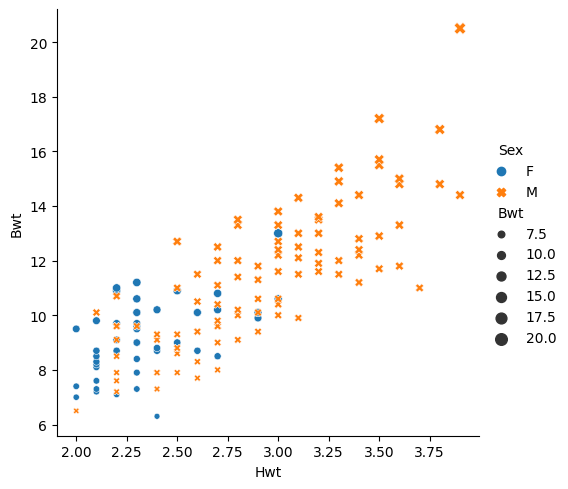

In [102]:
sns.relplot(data=cats,
            x='Hwt', y='Bwt',
            size='Bwt',
            hue='Sex', style='Sex')


3. Calculate and draw the regression line.


<Axes: xlabel='Hwt', ylabel='Bwt'>

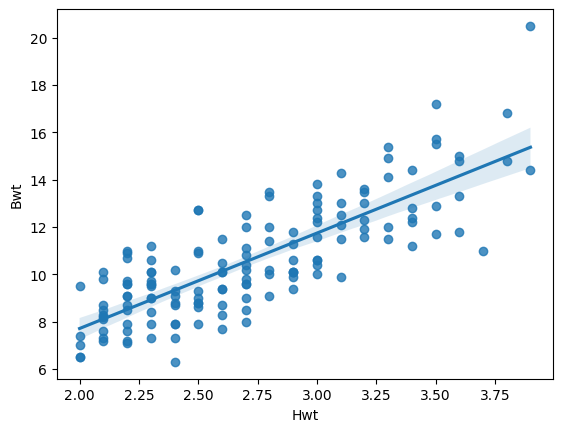

In [103]:
sns.regplot(data=cats,x='Hwt', y='Bwt')
# Je ziet een stijgend verband en bolletjes dicht bij de recht.

In [104]:
from sklearn.linear_model import LinearRegression

cats_hwt_x = cats.Hwt.values.reshape(-1,1)
cats_bwt_y = cats.Bwt

weight_model = LinearRegression().fit(cats_hwt_x, cats_bwt_y)

print(
    f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")


Regression line: ŷ = -0.35 + 4.03 x


4. Calculate the correlation coefficient and the coefficient of determination.

In [105]:
# Correlatiecoëfficiënt
R1 = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]
print(f"R = {R1}")

# Determinatie coëfficiënt
R2 = R1 ** 2
print(f"R^2= {R2}")


R = 0.804134787315513
R^2= 0.6466327561709654


5. Interpret the results from the previous steps.

In [106]:
# R ~0.8 -> Een stijgend verband want R > 0 en een sterk verband tussen Hwt en Bwt
# (Want 0.8)

# R² ~0.64 -> Een sterk verband + 
# 65 % van de variantie van de afhankelijk (Bwt) wordt verklaard door de onafhankelijke (Hwt)

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [107]:
cats_m = cats[cats["Sex"] == "M"]
cats_f = cats[cats["Sex"] == "F"]

2. Draw a scatter plot of both variables for each gender.


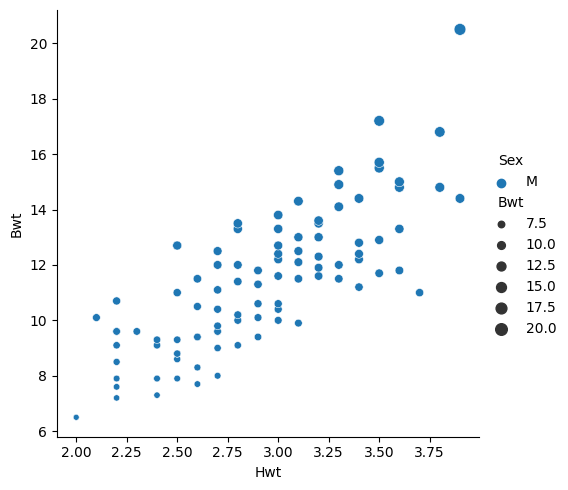

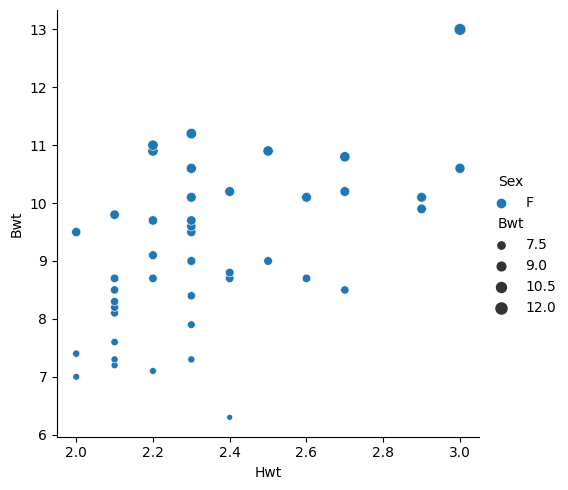

In [108]:
# Male (Onderscheid tussen 'sex', 
# niet nooit zakelijk want maar 1 gender sex wordt getoond)
sns.relplot(data=cats_m,
            x='Hwt', y='Bwt',
            size='Bwt',
            hue='Sex', style='Sex')
# Female
sns.relplot(data=cats_f,
            x='Hwt', y='Bwt',
            size='Bwt',
            hue='Sex', style='Sex')


3. Calculate and draw the regression line.


In [109]:
# Male
from sklearn.linear_model import LinearRegression
male_Hwt_x = cats_m.Hwt.values.reshape(-1, 1)
male_Bwt_y = cats_m.Bwt
weight_model = LinearRegression().fit(male_Hwt_x, male_Bwt_y)
print(
    f"Regression line male: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line male: ŷ = -1.18 + 4.31 x


In [110]:
# Female
female_Hwt_x = cats_f.Hwt.values.reshape(-1, 1)
female_Bwt_y = cats_f.Bwt
weight_model = LinearRegression().fit(female_Hwt_x, female_Bwt_y)
print(
    f"Regression line female: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line female: ŷ = 2.98 + 2.64 x


4. Calculate the correlation coefficient and the coefficient of determination.


In [111]:
# Male
# Correlatiecoëfficiënt
R1 = np.corrcoef(cats_m.Hwt, cats_m.Bwt)[0][1]
print(f"R male = {R1}")

# Determinatie coëfficiënt
R2 = R1 ** 2
print(f"R^2 male = {R2}")
print("")

# Female
# Correlatiecoëfficiënt
R1 = np.corrcoef(cats_f.Hwt, cats_f.Bwt)[0][1]
print(f"R female = {R1}")

# Determinatie coëfficiënt
R2 = R1 ** 2
print(f"R^2 female = {R2}")


R male = 0.7930443171812304
R^2 male = 0.628919289013444

R female = 0.5320496665060397
R^2 female = 0.28307684762918806


5. Interpret the results from the previous steps.

In [112]:
# --- MALE ---
# R ~ 0.79 -> Een stijgend verband want R > 0.7 en
# een sterk verband tussen Hwt en Bwt (Want 0.79)

# R² ~ 0.63 -> Een sterk verband +
# 63 % van de variantie van de afhankelijk (Bwt) wordt verklaard door de onafhankelijke (Hwt)

# --- FEMALE ---
# R ~ 0.53 -> Een matig verband want R > 0.5 en
# een sterk verband tussen Hwt en Bwt (Want 0.53)

# R² ~ 0.28 -> Een zeer zwak verband +
# 28 % van de variantie van de afhankelijk (Bwt) wordt verklaard door de onafhankelijke (Hwt)


### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [113]:
landbouw = pd.read_csv('../data/Landbouw Vlaanderen.csv', delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [114]:
# Gemakkelijk lange column names gebruiken :p
print(f"dtype jaar: {landbouw['jaar'].dtype}")
print(
    f"dtype aantal land en tuinbouwbedrijven: {landbouw['aantal land en tuinbouwbedrijven'].dtype}")
print(
    f"dtype gemiddelde oppervlakte per bedrijf (ha): {landbouw['gemiddelde oppervlakte per bedrijf (ha)'].dtype}")

# Alles
landbouw.dtypes

dtype jaar: int64
dtype aantal land en tuinbouwbedrijven: int64
dtype gemiddelde oppervlakte per bedrijf (ha): object


jaar                                        int64
aantal land en tuinbouwbedrijven            int64
gemiddelde oppervlakte per bedrijf (ha)    object
dtype: object

3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [115]:
landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = landbouw['gemiddelde oppervlakte per bedrijf (ha)'].str.replace(
    ",", ".").astype(float)
landbouw.dtypes


jaar                                         int64
aantal land en tuinbouwbedrijven             int64
gemiddelde oppervlakte per bedrijf (ha)    float64
dtype: object

4. Draw a scatter plot of the number of farms versus the year.


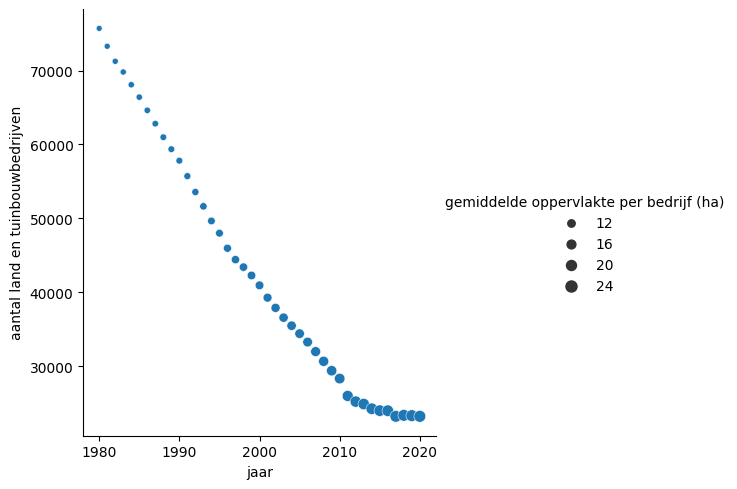

In [116]:
sns.relplot(data=landbouw,
            x='jaar', y='aantal land en tuinbouwbedrijven', size="gemiddelde oppervlakte per bedrijf (ha)"
)

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

In [117]:
# Correlatiecoëfficiënt
R = np.corrcoef(landbouw["jaar"],
                landbouw["aantal land en tuinbouwbedrijven"])[0][1]
print(f"R = {R}")

# R < 0 -> de relatie is dalend (minder boerderinen naarmate de tijd verder gaat)+ 
# Zeer sterk verband tussen jaar en boederijen (|0.98| ~ 1)

R = -0.9861066349492859


6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

In [118]:
# Determinatie coëfficiënt
R2 = R ** 2
print(f"R² = {R2}")

# R² ~ 0.97 -> Een uitzonderlijk sterk tussen jaar en aantal +
# 97 % van de variantie van de afhankelijk () wordt verklaard door de onafhankelijke ()


R² = 0.9724062954910041


7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

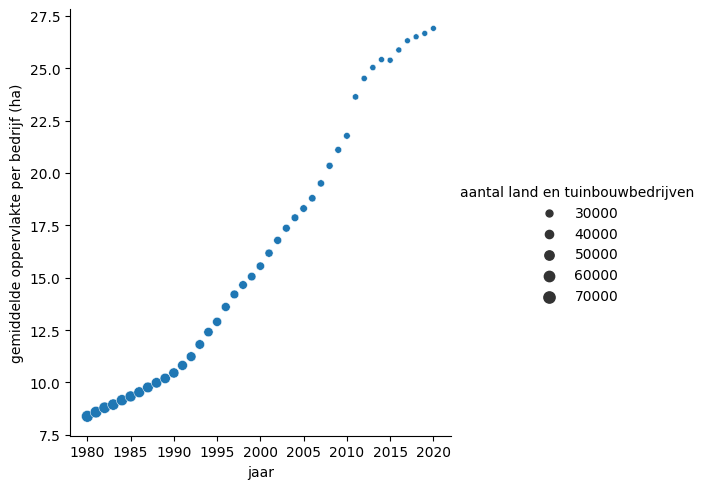

In [119]:
sns.relplot(data=landbouw,
            x='jaar', y='gemiddelde oppervlakte per bedrijf (ha)',
            size='aantal land en tuinbouwbedrijven'
            )


8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [120]:
from sklearn.linear_model import LinearRegression

x = landbouw['jaar'].values.reshape(-1, 1)
y = landbouw['gemiddelde oppervlakte per bedrijf (ha)']

model = LinearRegression().fit(x, y)

print(
    f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")


Regression line: ŷ = -1031.90 + 0.52 x


In [121]:
oppervlakte_2035 = model.predict([[2035]])[0]
print(oppervlakte_2035)

34.91987804878045


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

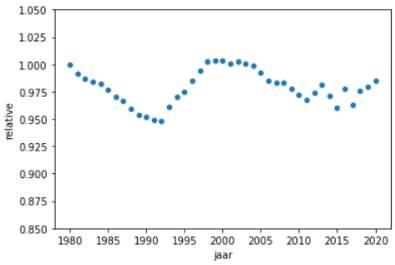


In [122]:
landbouw['totaal_gebied'] = landbouw['aantal land en tuinbouwbedrijven'] * landbouw['gemiddelde oppervlakte per bedrijf (ha)']
landbouw.head(10)

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),totaal_gebied
0,1980,75706,8.38,634416.28
1,1981,73292,8.58,628845.36
2,1982,71255,8.79,626331.45
3,1983,69807,8.94,624074.58
4,1984,68083,9.15,622959.45
5,1985,66408,9.33,619586.64
6,1986,64624,9.53,615866.72
7,1987,62814,9.76,613064.64
8,1988,60983,9.98,608610.34
9,1989,59365,10.19,604929.35


In [123]:
totaal_gebied_1980 = landbouw[landbouw['jaar'] == 1980]['totaal_gebied'][0]
print(totaal_gebied_1980)


634416.28


In [124]:
landbouw['relatief_1980_gebied'] = landbouw['totaal_gebied'] / totaal_gebied_1980
landbouw.head()


,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),totaal_gebied,relatief_1980_gebied
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


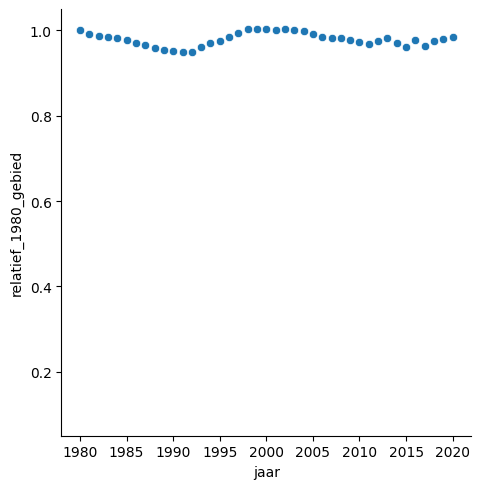

In [125]:
# We gaab y limit aanpassen zo dat 'uitgezoomd' kunnen zien
p = sns.relplot(data=landbouw,
            x='jaar', y='relatief_1980_gebied',)
p.set(ylim=(0.05,1.05))


## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [126]:
movies = pd.read_csv('../data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [127]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [128]:
for c in cols_with_dollars:
    movies[c] = movies[c].str.replace("$", "").str.replace(" ", "").astype(float)/1000000

/var/folders/6h/cr3sf88d50n4xm01zbt4bq6r0000gn/T/ipykernel_6731/3644652354.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[c] = movies[c].str.replace("$", "").str.replace(" ", "").astype(float)/1000000


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

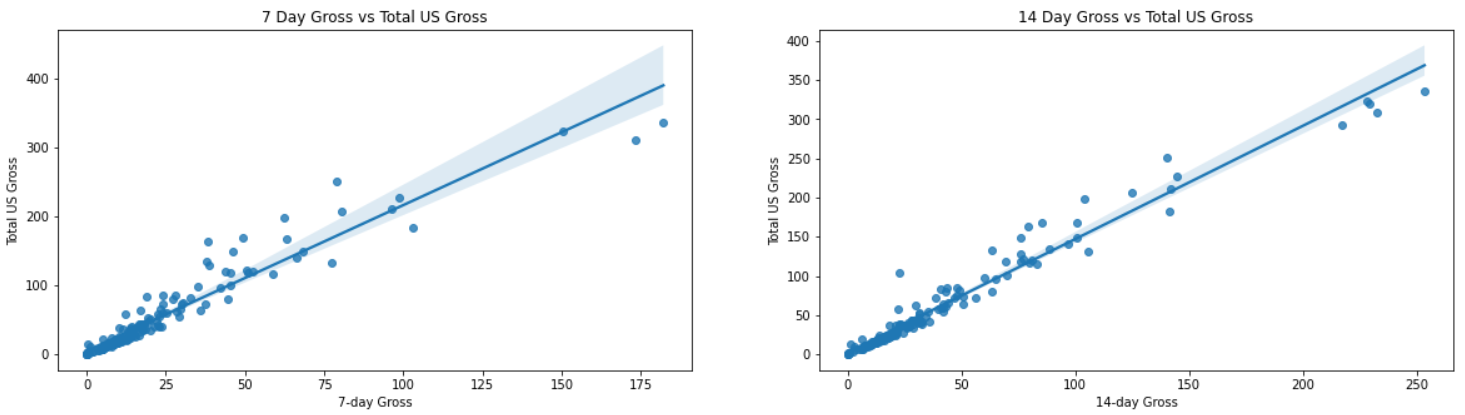

Text(0.5, 1.0, '14-day Gross')

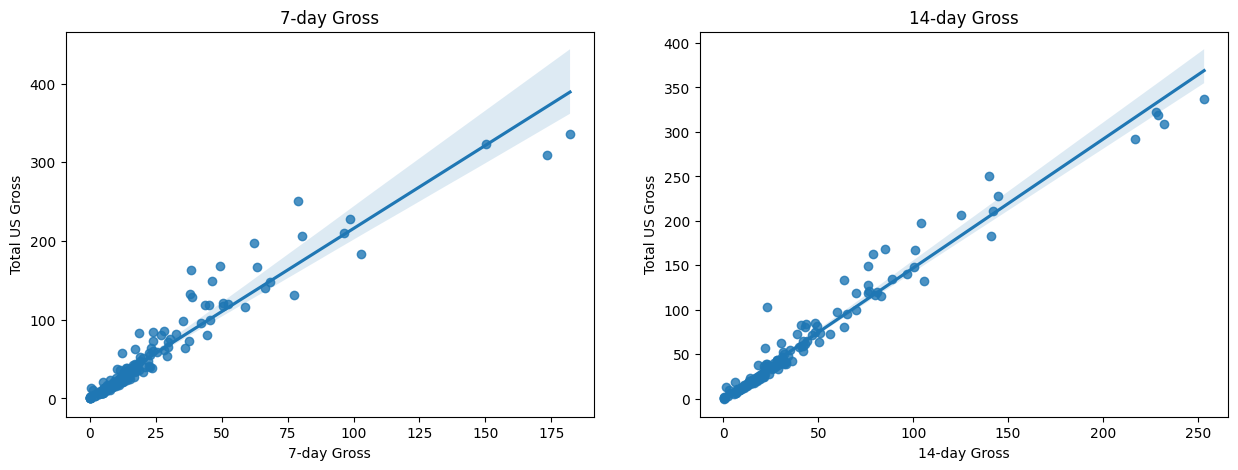

In [129]:

fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.regplot(x=movies['7-day Gross'], y=movies['Total US Gross'],ax=axs[0])
axs[0].set_title('7-day Gross')
sns.regplot(x=movies['14-day Gross'], y=movies['Total US Gross'], ax=axs[1])
axs[1].set_title('14-day Gross')


4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [130]:
# We gaan NaN droppen, note: we beperken ons alleen op de kolommen 
# die we nodig hebben.
# Anders gaan er teveel kolommen weg als we volledig tabel dropna'en
extra_7_days_gross = movies.dropna(subset=['7-day Gross', 'Total US Gross'])
extra_14_days_gross = movies.dropna(subset=['14-day Gross', 'Total US Gross'])

# R & R² (7 day)
x = extra_7_days_gross['7-day Gross']
y = extra_7_days_gross['Total US Gross']
cor = np.corrcoef(x,y)[0][1]
print(f"R = {cor}")
cod = cor ** 2
print(f"R² = {cod}")
# R ~ 0.96 -> Er is een stijgend verband tussen hoeveel een film eerste 7 dagen opbrengt en
# hoeveel in totaal opbrengt + Uitstekend verband
# R² ~0.92 -> Zeer sterk verband + 92 % van da variantie van de afh veranderlijke wordt verklaard door de onafhankelijke veranderlijke

# R & R² (14 day)
x = extra_14_days_gross['14-day Gross']
y = extra_14_days_gross['Total US Gross']
cor = np.corrcoef(x, y)[0][1]
print(f"R = {cor}")
cod = cor ** 2
print(f"R² = {cod}")

R = 0.9594075444143062
R² = 0.920462836279089
R = 0.9813238689021968
R² = 0.9629965356771759


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [131]:
from sklearn.linear_model import LinearRegression
# (7 day)
x = extra_7_days_gross['7-day Gross'].values.reshape(-1, 1)
y = extra_7_days_gross['Total US Gross']

model = LinearRegression().fit(x, y)

print(
    f"7-day Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")


print(
    f"Ook als de film eerste week 0 dollar opbrengt, \nverdien je toch nog in totaal ${model.intercept_:.2f} miljoen dollar")


print()
# (14 day)
x = extra_14_days_gross['14-day Gross'].values.reshape(-1, 1)
y = extra_14_days_gross['Total US Gross']

model = LinearRegression().fit(x, y)

print(
    f"14-day Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")


7-day Regression line: ŷ = 4.59 + 2.11 x
Ook als de film eerste week 0 dollar opbrengt, 
verdien je toch nog in totaal $4.59 miljoen dollar

14-day Regression line: ŷ = 2.45 + 1.45 x


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

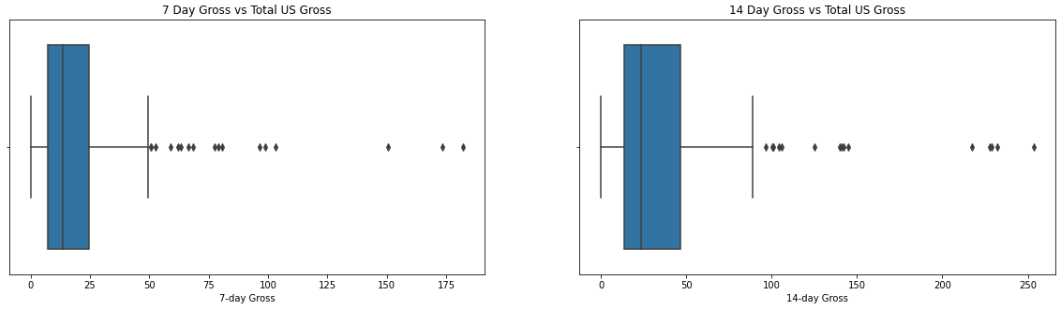

Text(0.5, 1.0, '14-day Gross')

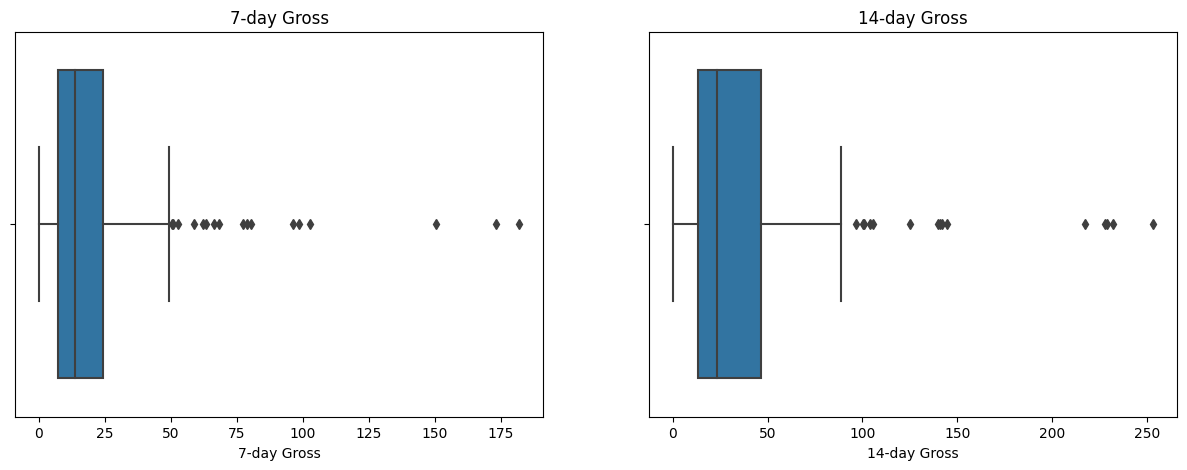

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# Het is te zien, dat er films zijn in de eerste week die meer verdienen dan het gemiddelde
sns.boxplot(data=extra_7_days_gross, x='7-day Gross', ax=axs[0])
axs[0].set_title('7-day Gross')
sns.boxplot(data=extra_14_days_gross, x='14-day Gross', ax=axs[1])
axs[1].set_title('14-day Gross')


* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [133]:
print("7 days")
q1_7_days = extra_7_days_gross['7-day Gross'].quantile(0.25)
print(f"q1: {q1_7_days}\n")
q3_7_days = extra_7_days_gross['7-day Gross'].quantile(0.75)
print(f"q3: {q3_7_days}\n")

iqr_7_days = q3_7_days - q1_7_days
limit_7_days = q3_7_days + 1.5 * iqr_7_days
print(f"iqr: {iqr_7_days}")
print(f"limit: {limit_7_days}\n")

print("14 days")
q1_14_days = extra_14_days_gross['14-day Gross'].quantile(0.25)
print(f"q1: {q1_14_days}\n")
q3_14_days = extra_14_days_gross['14-day Gross'].quantile(0.75)
print(f"q3: {q3_14_days}\n")

iqr_14_days = q3_14_days - q1_14_days
limit_14_days = q3_14_days + 1.5 * iqr_14_days
print(f"iqr: {iqr_14_days}")
print(f"limit: {limit_14_days}")


7 days
q1: 7.1859547500000005

q3: 24.462228

iqr: 17.27627325
limit: 50.376637875

14 days
q1: 13.555127

q3: 46.649346

iqr: 33.094219
limit: 96.2906745


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

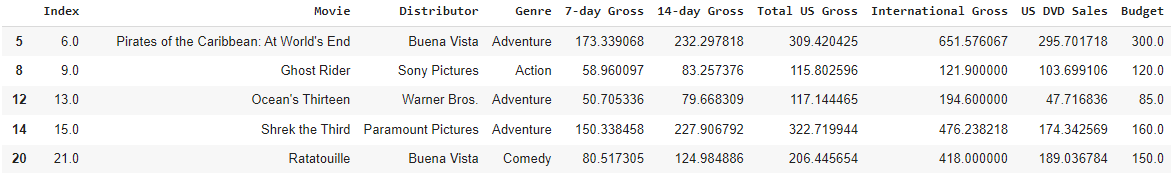

In [134]:
extra_7_days_gross[extra_7_days_gross['7-day Gross'] > limit_7_days]

extra_14_days_gross[extra_14_days_gross['14-day Gross'] > limit_14_days]


,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0
28,29.0,The Bourne Ultimatum,Universal,Action,98.673300,144.820320,227.471070,214.690492,123.288965,130.0
32,33.0,Fantastic Four: Rise of the Silver Surfer,20th Century Fox,Action,77.453559,105.800808,131.921738,156.293581,62.251422,120.0
35,36.0,Casino Royale,MGM,Action,63.267784,100.763154,167.365000,429.000000,79.665820,102.0
37,38.0,The Transformers,Paramount Pictures,Action,NaN,228.950080,319.246193,389.026399,290.541120,151.0
60,61.0,Spider-Man 3,Sony Pictures,Adventure,182.070572,253.357629,336.530303,554.341323,123.997036,258.0
104,105.0,The Simpsons Movie,20th Century Fox,Comedy,102.949705,141.112342,183.135014,343.936008,96.337909,72.5
118,119.0,Night at the Museum,20th Century Fox,Comedy,79.055249,140.096754,250.863268,323.617573,153.286880,110.0


* 6.4 Remove the outliers out of the dataset.

In [135]:
extra_7_days_gross = extra_7_days_gross[extra_7_days_gross['7-day Gross'] < limit_7_days]

extra_14_days_gross = extra_14_days_gross[extra_14_days_gross['14-day Gross'] < limit_14_days]


* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [136]:
# R & R² (7 day)
x = extra_7_days_gross['7-day Gross']
y = extra_7_days_gross['Total US Gross']
cor = np.corrcoef(x, y)[0][1]
print(f"R = {cor}")
cod = cor ** 2
print(f"R² = {cod}\n")

# R & R² (14 day)
x = extra_14_days_gross['14-day Gross']
y = extra_14_days_gross['Total US Gross']
cor = np.corrcoef(x, y)[0][1]
print(f"R = {cor}")
cod = cor ** 2
print(f"R² = {cod}")


R = 0.9324792650689286
R² = 0.8695175797834893

R = 0.9584258717658027
R² = 0.9185801516700389


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

In [137]:
# (7 day)
x = extra_7_days_gross['7-day Gross'].values.reshape(-1, 1)
y = extra_7_days_gross['Total US Gross']

model = LinearRegression().fit(x, y)

print(
    f"7-day Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")


# (14 day)
x = extra_14_days_gross['14-day Gross'].values.reshape(-1, 1)
y = extra_14_days_gross['Total US Gross']

model = LinearRegression().fit(x, y)

print(
    f"14-day Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")


7-day Regression line: ŷ = -5.07 + 2.75 x
14-day Regression line: ŷ = -3.23 + 1.65 x


## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  
(a) Make the following plot  

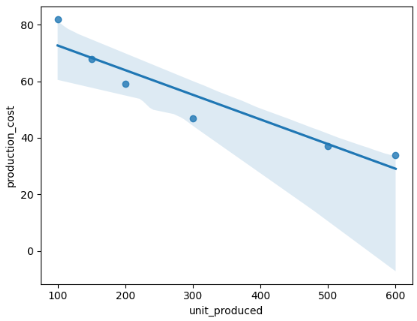

(b) Based on this plot  
(b.1) Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
(b.2) Can you decide whether the relationship between number of units produced and production costis weak / strong.  
(b.3) Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
(c) What is the production cost for the 400th unit?  
(d) How much loss will the company incur if not a single unit is produced?  
(e) How much does it cost in total to produce 1000 units  


Some answers  
(c) the 400th unit costs 46.5051  
(d) loss when no unit produced 81.392  
(e) total cost for 1000 units 37739.8969

In [138]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

,unit_produced,production_cost
0,100,82
1,150,68
2,200,59
3,300,47
4,500,37
5,600,34


<Axes: xlabel='unit_produced', ylabel='production_cost'>

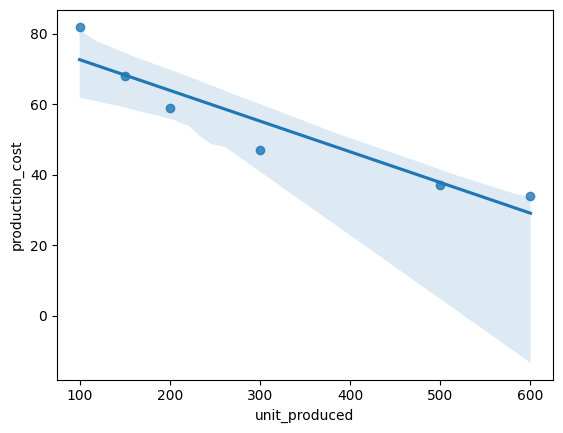

In [139]:
sns.regplot(data=df,x='unit_produced',y='production_cost')

In [140]:
# B.1 een negatief verband tussen unit-produced en production_cost want de rechte is dalend
# B.2 Sterk verband omdat de punten liggen dicht bij de rechte 
# B.3 waarde van R ligt in het interval [-1, 0.5]

x = df['unit_produced']
y = df['production_cost']

# Python functie numpy.corrcoef() - geeft een matrix terug, zoals numpy.cov()
cor = np.corrcoef(x, y)[0][1]
print(f"R = {cor}")


R = -0.9395115809338715


In [141]:
# C
from sklearn.linear_model import LinearRegression

x = df['unit_produced'].values.reshape(-1, 1)
y = df['production_cost']

model = LinearRegression().fit(x, y)

print(
    f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")


Regression line: ŷ = 81.39 + -0.09 x


In [142]:
unit_400 = model.predict([[400]])[0]
print(unit_400)


46.50515463917525


In [143]:
# D
unit_0 = model.predict([[0]])[0]
print(unit_0)


81.3917525773196


In [144]:
# E
np.sum([model.predict([[x]])[0] for x in range(1, 1001)])



37739.896907216484